In [4]:
# from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [10]:
discfile = '..\\dataset\\data_test.csv'
data = pd.read_csv(discfile)
data=data['number']
data.head()

0    597816.0
1    583104.0
2    572465.0
3    561279.0
4    551589.0
Name: number, dtype: float64

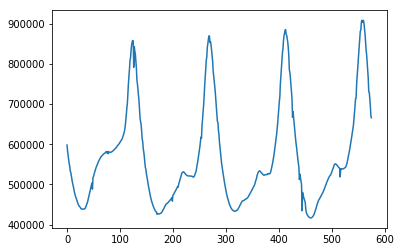

In [14]:
data.plot(figsize=(6,4))
# print(data)

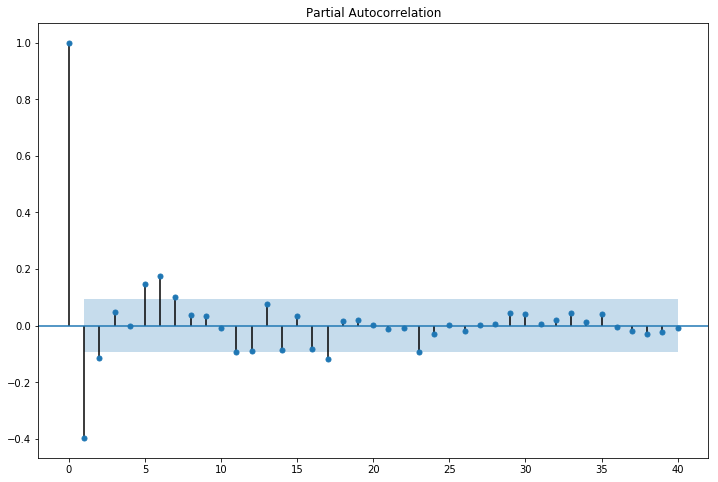

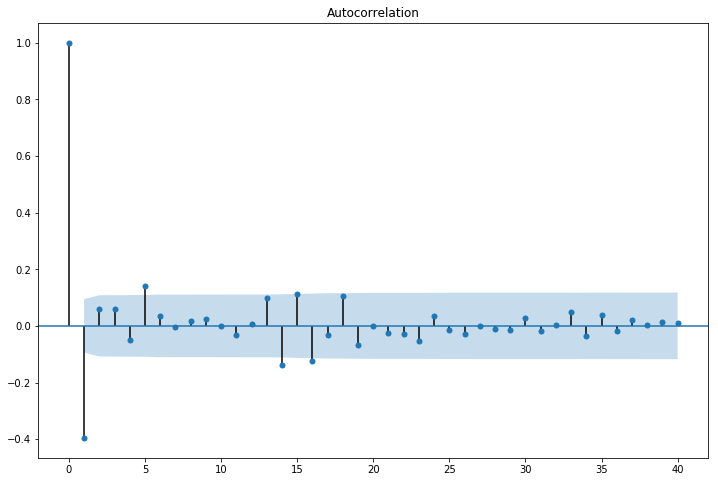

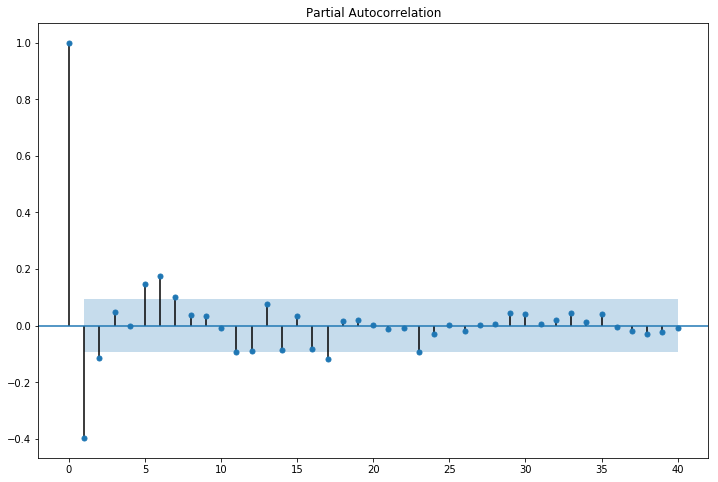

In [15]:
#使用一阶差分，12步差分处理时间序列
diff_1 = data.diff(1)
diff1 = diff_1.dropna()
diff1_144_1 = diff_1-diff_1.shift(144)
diff1_144 = diff1_144_1.dropna()
#print(diff1_144_1)
#判断序列是否平稳，计算ACF，PACF
fig1 = plt.figure(figsize=(12,8))
ax1=fig1.add_subplot(111)
sm.graphics.tsa.plot_acf(diff1_144,lags=40,ax=ax1)
fig2 = plt.figure(figsize=(12,8))
ax2=fig2.add_subplot(111)
sm.graphics.tsa.plot_pacf(diff1_144,lags=40, ax=ax2)

In [16]:
#模型定阶，根据aic,bic,hqic,三者都是越小越好
# arma_mod01 = sm.tsa.ARMA(diff1_144,(0,1)).fit()
# print(arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)
# arma_mod10 = sm.tsa.ARMA(diff1_144,(1,0)).fit()
# print(arma_mod10.aic,arma_mod10.bic,arma_mod10.hqic)
# arma_mod60 = sm.tsa.ARMA(diff1_144,(6,0)).fit()
# print(arma_mod60.aic,arma_mod60.bic,arma_mod60.hqic)
arma_mod61 = sm.tsa.ARMA(diff1_144,(6,1)).fit()
print(arma_mod61.aic,arma_mod61.bic,arma_mod61.hqic)

d:\software\develop\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


8758.668067654984 8795.263040465918 8773.116977761068


2.0010192093347703


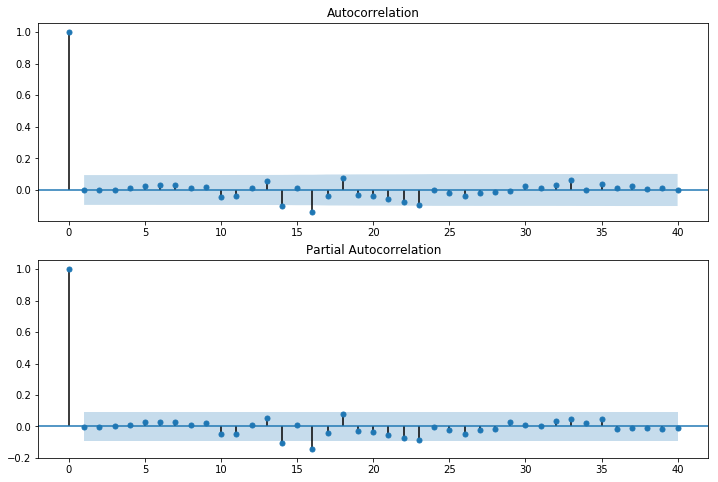

In [17]:
#计算残差
resid = arma_mod61.resid
#看残差的acf和pacf,残差自相关图断尾，所以残差序列为白噪声
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

print(sm.stats.durbin_watson(arma_mod61.resid.values))

In [24]:
# 残差DW检验，DW的值越接近2，表示越不相关
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
d = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(d, columns=['lag', "AC", "Q", "Prob(>Q)"])
# print(table.set_index('lag'))

In [25]:
# 用模型预测
#predict_data=arma_mod61.predict(start='2017/04/04 23:50',end='2017/04/06 00:00',dynamic=False)

0      597816.0
1      583104.0
2      572465.0
3      561279.0
4      551589.0
5      546159.0
6      533176.0
7      530391.0
8      522041.0
9      512983.0
10     506097.0
11     500271.0
12     494179.0
13     487094.0
14     480757.0
15     474739.0
16     470707.0
17     466467.0
18     462827.0
19     458408.0
20     454969.0
21     450804.0
22     448096.0
23     446421.0
24     444913.0
25     442705.0
26     440502.0
27     439000.0
28     438768.0
29     438406.0
         ...   
691         NaN
692         NaN
693         NaN
694         NaN
695         NaN
696         NaN
697         NaN
698         NaN
699         NaN
700         NaN
701         NaN
702         NaN
703         NaN
704         NaN
705         NaN
706         NaN
707         NaN
708         NaN
709         NaN
710         NaN
711         NaN
712         NaN
713         NaN
714         NaN
715         NaN
716         NaN
717         NaN
718         NaN
719         NaN
720         NaN
Name: number, Length: 72

d:\software\develop\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


8758.668067654984 8795.263040465918 8773.116977761068
2.0010192093347703
            AC          Q  Prob(>Q)
lag                                
1.0  -0.002061   0.001844  0.965745
2.0  -0.002382   0.004313  0.997846
3.0   0.002806   0.007746  0.999819
4.0   0.009749   0.049282  0.999701
5.0   0.027425   0.378778  0.995894
6.0   0.029323   0.756344  0.993193
7.0   0.029987   1.152130  0.991988
8.0   0.009448   1.191510  0.996725
9.0   0.019532   1.360218  0.998057
10.0 -0.044771   2.248768  0.994053
11.0 -0.040862   2.990675  0.990849
12.0  0.011344   3.047987  0.995196
13.0  0.056183   4.457255  0.985284
14.0 -0.101288   9.048682  0.827919
15.0  0.009780   9.091587  0.872680
16.0 -0.136810  17.508518  0.353451
17.0 -0.040942  18.264127  0.372364
18.0  0.076638  20.918145  0.283563
19.0 -0.032965  21.410374  0.314575
20.0 -0.036031  21.999855  0.340518
21.0 -0.054508  23.352253  0.325488
22.0 -0.073111  25.791203  0.260755
23.0 -0.095535  29.965991  0.150380
24.0 -0.000842  29.966316  

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

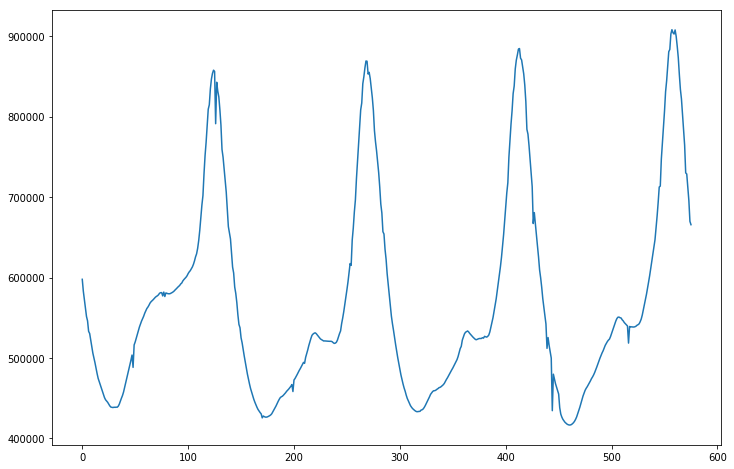

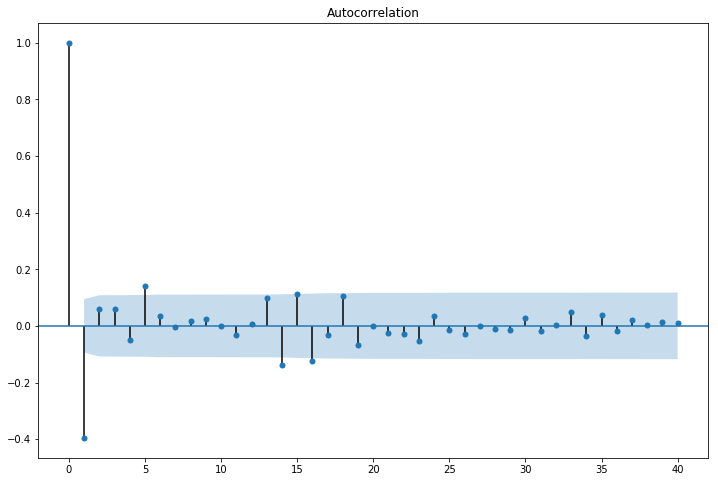

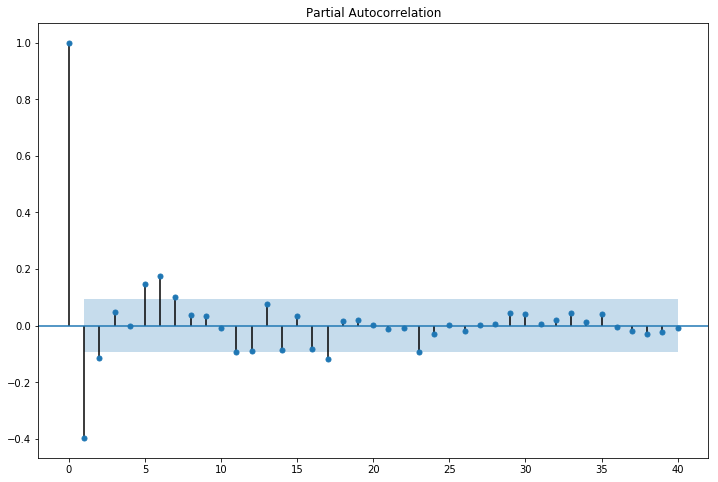

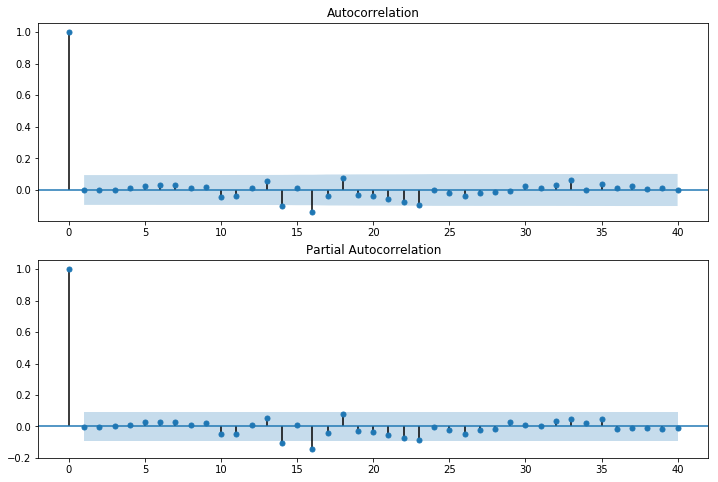

In [28]:
#-*- coding: utf-8 -*-

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#读取Excel数据
discfile = '..\\dataset\\data_test.csv'
data = pd.read_csv(discfile)
data=data['number']
data.head()

data.plot(figsize=(12,8))
print(data)

#使用一阶差分，12步差分处理时间序列
diff_1 = data.diff(1)
diff1 = diff_1.dropna()
diff1_144_1 = diff_1-diff_1.shift(144)
diff1_144 = diff1_144_1.dropna()
#print(diff1_144_1)
#判断序列是否平稳，计算ACF，PACF
fig1 = plt.figure(figsize=(12,8))
ax1=fig1.add_subplot(111)
sm.graphics.tsa.plot_acf(diff1_144,lags=40,ax=ax1)
fig2 = plt.figure(figsize=(12,8))
ax2=fig2.add_subplot(111)
sm.graphics.tsa.plot_pacf(diff1_144,lags=40, ax=ax2)

#模型定阶，根据aic,bic,hqic,三者都是越小越好
# arma_mod01 = sm.tsa.ARMA(diff1_144,(0,1)).fit()
# print(arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)
# arma_mod10 = sm.tsa.ARMA(diff1_144,(1,0)).fit()
# print(arma_mod10.aic,arma_mod10.bic,arma_mod10.hqic)
# arma_mod60 = sm.tsa.ARMA(diff1_144,(6,0)).fit()
# print(arma_mod60.aic,arma_mod60.bic,arma_mod60.hqic)
arma_mod61 = sm.tsa.ARMA(diff1_144,(6,1)).fit()
print(arma_mod61.aic,arma_mod61.bic,arma_mod61.hqic)
#计算残差
resid = arma_mod61.resid
#看残差的acf和pacf,残差自相关图断尾，所以残差序列为白噪声
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

print(sm.stats.durbin_watson(arma_mod61.resid.values))
# 残差DW检验，DW的值越接近2，表示越不相关
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
d = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(d, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

# 用模型预测
predict_data=arma_mod61.predict('2017/4/4 23:50','2017/4/6 00:00',dynamic=False)
# print(predict_data)
# print(diff_1)
# 由于是用差分后的值做的预测，因此需要把结果还原
# 144步差分还原
diff1_144_shift=diff_1.shift(144)
# print('print diff1_144_shift')
print(diff1_144_shift)
diff_recover_144=predict_data.add(diff1_144_shift)
# 一阶差分还原
diff1_shift=data.shift(1)
diff_recover_1=diff_recover_144.add(diff1_shift)
diff_recover_1=diff_recover_1.dropna() # 最终还原的预测值
print('预测值')
print(diff_recover_1)

# 实际值、预测值、差分预测值作图
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['2017-04-01':].plot(ax=ax)
ax = diff_recover_1.plot(ax=ax)
fig = arma_mod61.plot_predict('2017/4/2 23:50', '2017/4/6 00:00', dynamic=False, ax=ax, plot_insample=False)
plt.show()

